## FPoliSolutions, LLC; Asset Monitoring and Predictive Maintenance
## Cluster Analysis

### Arnab Dey Sarkar

#### Cluster analysis

Now we know that our data has two response `Y=0` and `Y=1`. We will ignore that and check 3 clusters or so and also show the a graph to check optimal clusters. Still we should eventually start with 2 clusters and we will just use one variable.

Although we have seen before that our data has no missing value. We will still do it to maintain a good practice.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv("training_data.csv")

In [4]:
df_clean=df.dropna().copy()

In [5]:
df_clean_copy=df.copy()

df_clean_copy_features = df_clean_copy.drop(columns=['Y'])

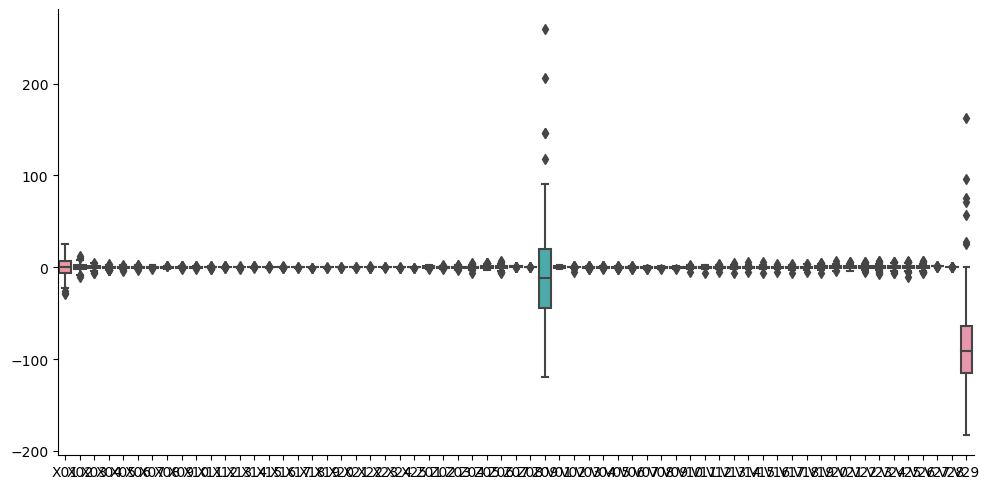

In [6]:
sns.catplot(data = df_clean_copy_features, kind='box', aspect=2)

plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

Xpoli= StandardScaler().fit_transform(df_clean_copy_features)

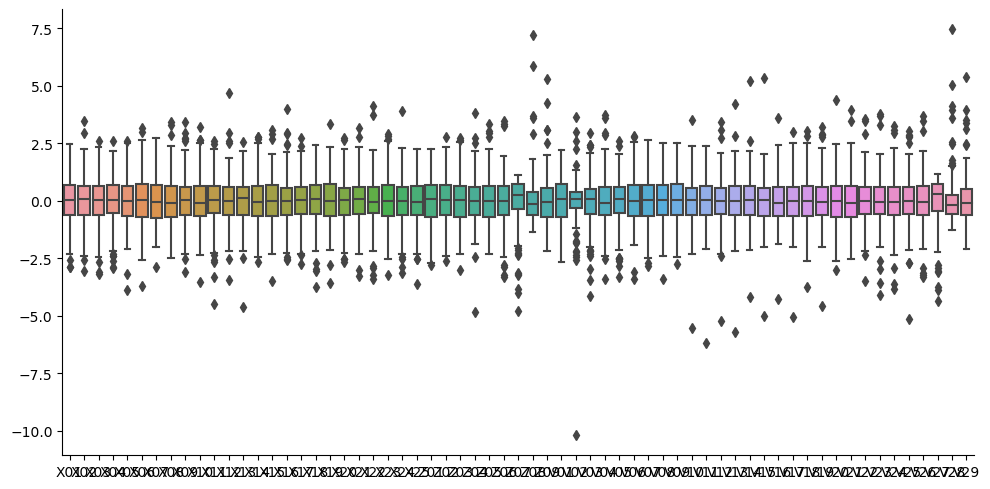

In [8]:
sns.catplot(data = pd.DataFrame(Xpoli, columns=df_clean_copy_features.columns),
            kind='box', aspect=2)

plt.show()

We have removed the scale effect now. No missing rows. KMeans NOW!!

In [9]:
clusters_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).\
    fit_predict( Xpoli )

In [10]:
df_clean_copy['k2']=pd.Series(clusters_2, index=df_clean_copy.index).astype('category')

In [11]:
df_clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X01     223 non-null    float64 
 1   X02     223 non-null    float64 
 2   X03     223 non-null    float64 
 3   X04     223 non-null    float64 
 4   X05     223 non-null    float64 
 5   X06     223 non-null    float64 
 6   X07     223 non-null    float64 
 7   X08     223 non-null    float64 
 8   X09     223 non-null    float64 
 9   X10     223 non-null    float64 
 10  X11     223 non-null    float64 
 11  X12     223 non-null    float64 
 12  X13     223 non-null    float64 
 13  X14     223 non-null    float64 
 14  X15     223 non-null    float64 
 15  X16     223 non-null    float64 
 16  X17     223 non-null    float64 
 17  X18     223 non-null    float64 
 18  X19     223 non-null    float64 
 19  X20     223 non-null    float64 
 20  X21     223 non-null    float64 
 21  X22     223 non-

In [12]:
df_clean_copy.k2.value_counts()

1    119
0    104
Name: k2, dtype: int64

In [13]:
df.Y.value_counts()

1    138
0     85
Name: Y, dtype: int64

Clearly there are some mismatch. Lets calculate the extent of mismatch.

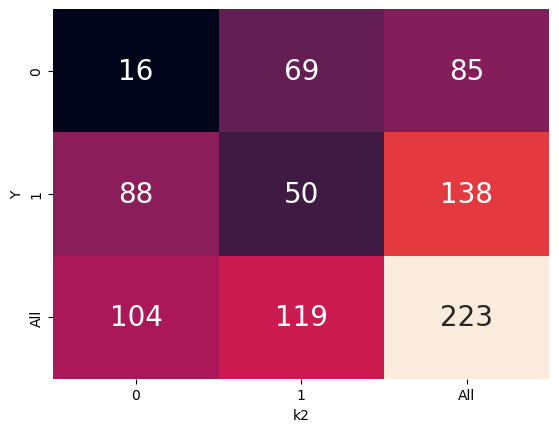

In [14]:
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab( df_clean_copy.Y, df_clean_copy.k2, margins=True),
            annot=True, annot_kws={'fontsize': 20}, fmt='g',
            cbar=False,
            ax=ax )

plt.show()

Out of 104 rows corresponding to `k2=0`, 88 of them falls into `Y=1` with Prob(Y=1|k2=0)=88/104 and Hence we can say if a machine falls under the category `k2=0` there is a high probability that it is going to fail soon.

Lets see the optimal number of cluster by KMeans here,

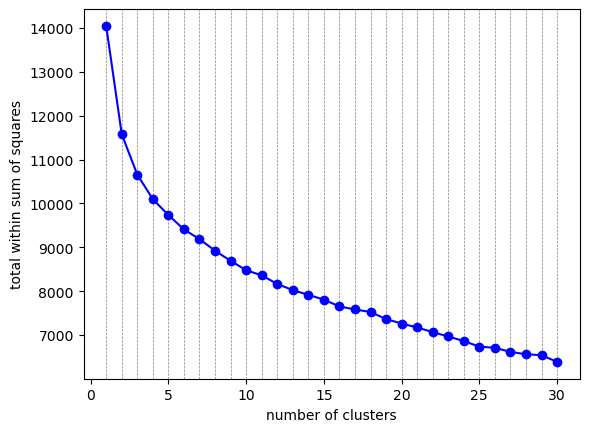

In [15]:
opt_clus=[]

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit(Xpoli)
    
    opt_clus.append(km.inertia_)
    
fig, ax =plt.subplots()

for x_value in range(1, max(K) + 1):
    ax.axvline(x=x_value, color='gray', linewidth=0.5, linestyle='--')
    
ax.plot(K, opt_clus, 'bo-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

#ax.set_ylim(0, max(opt_clus) + 10000)  # Adjust the upper limit as needed

plt.show()

I can see an elbow bend at cluster=2 but I can also see another bend at 4. Lets do with cluster=4.

In [16]:
clusters_4 = KMeans(n_clusters=4, random_state=121, n_init=25, max_iter=500).\
    fit_predict( Xpoli )

In [17]:
df_clean_copy['k4']=pd.Series(clusters_4, index=df_clean_copy.index).astype('category')

In [18]:
df_clean_copy.k4.value_counts()

3    103
1     63
2     52
0      5
Name: k4, dtype: int64

Now lets draw the pair plot with hue facets for both cluster=2 and cluster=4. Here we can't use the humongous 63 feature variables. Hence we will draw via part features 'X01','X02','Z01','Z02', 'V01', 'V02','Y' that we selected before.

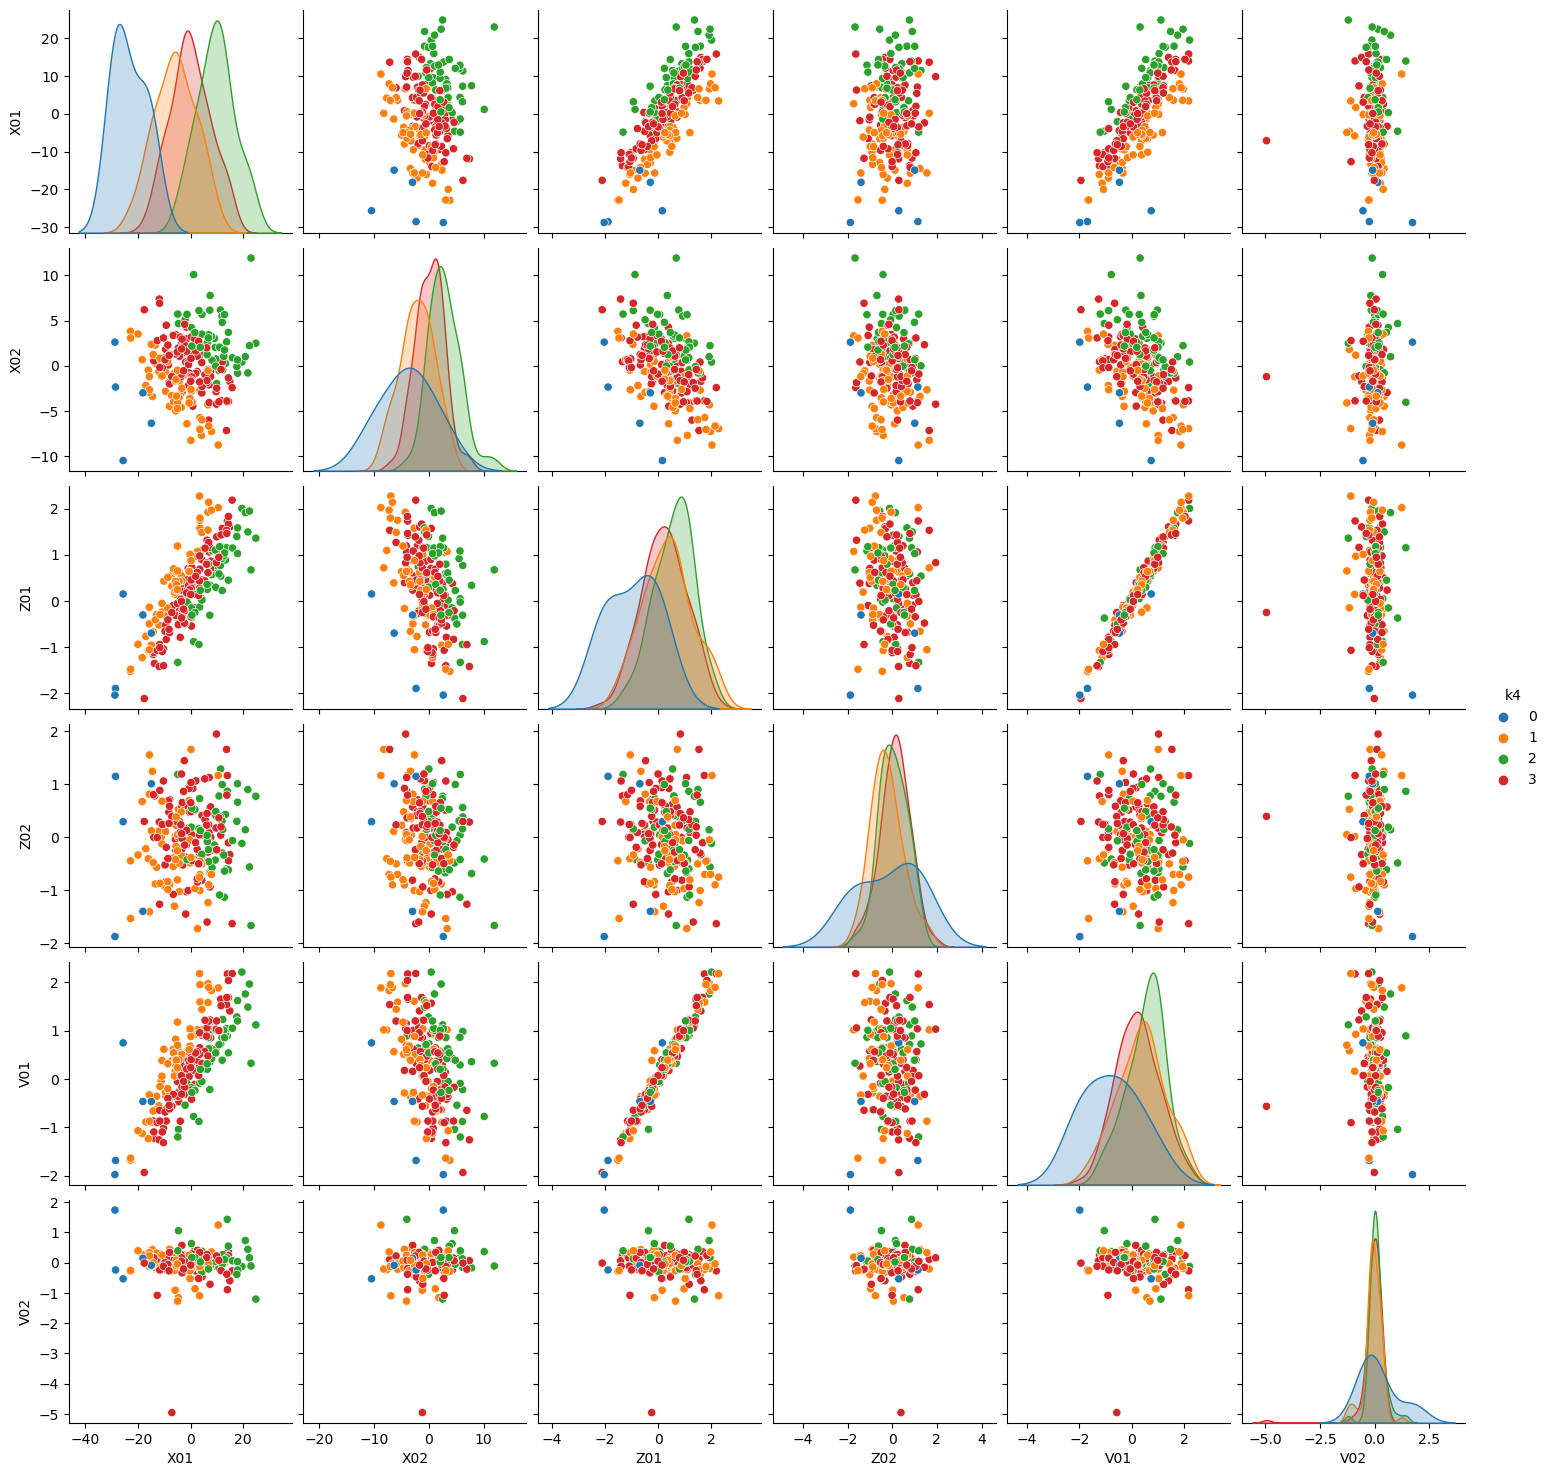

In [19]:
df_clean_copy_part_features = df_clean_copy[['X01','X02','Z01','Z02', 'V01', 'V02','k4' ]].copy()
sns.pairplot(data=df_clean_copy_part_features, hue='k4',diag_kws={'common_norm': False})

plt.show()

I don't see a good sepration with 4 clusters here. Although the Kmeans might seperate the data well because we are seeing the data in 2D with the effect of 2 features, we see this problem.

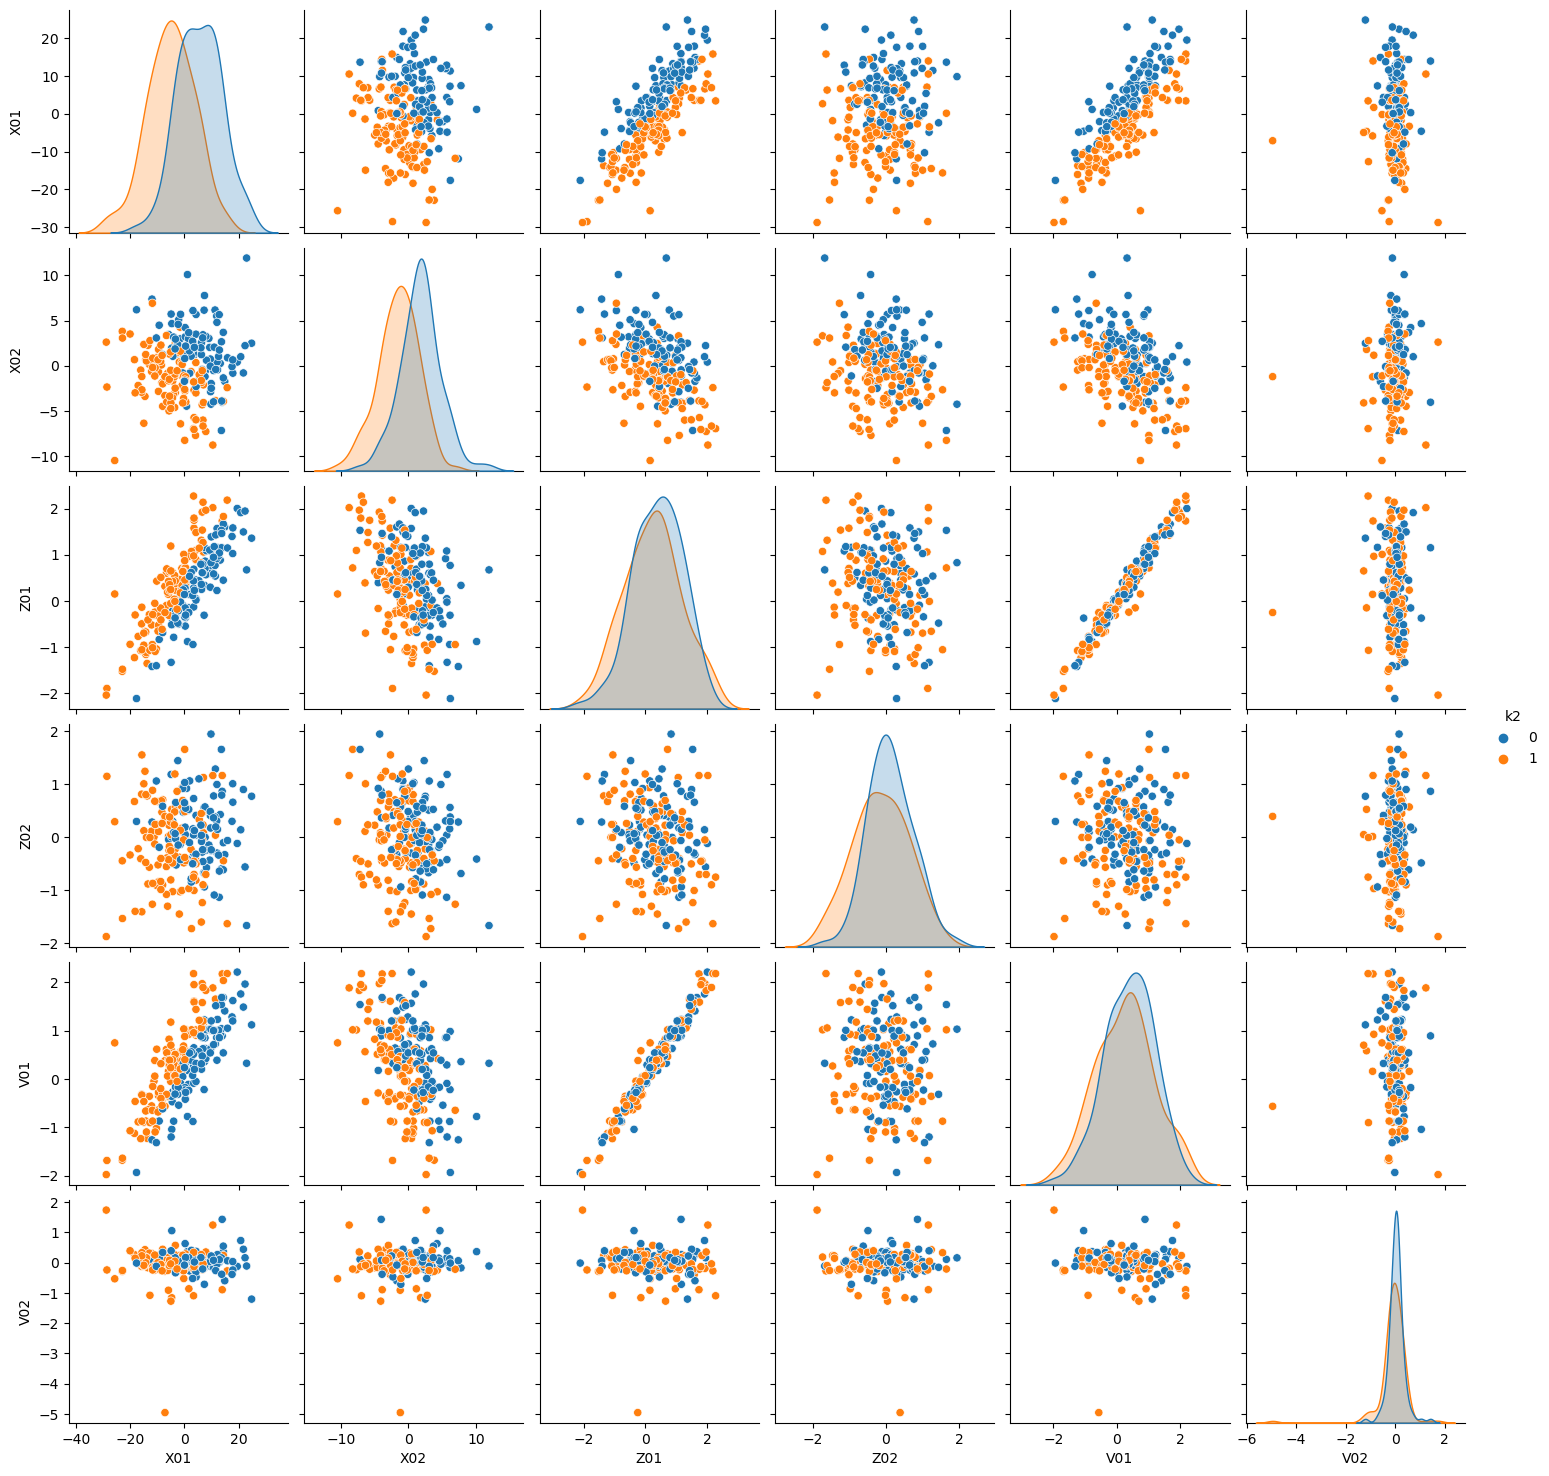

In [20]:
df_clean_copy_part_features = df_clean_copy[['X01','X02','Z01','Z02', 'V01', 'V02','k2' ]].copy()
sns.pairplot(data=df_clean_copy_part_features, hue='k2', diag_kws={'common_norm': False})

We can see a better separation this time visually with (V01, X01) and (X01,X02). Hence our next goal is to seperate the data using them into 2 Kmeans clusters (X01,X02).

In [21]:
df_clean_X01X02feature=Xpoli[:,:2].copy()

In [22]:
df_clean_X01X02feature.shape

(223, 2)

In [23]:
df_clean_copy['k2_X01X02']=pd.Series(KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).
                                     fit_predict(df_clean_X01X02feature),
                                     index=df_clean.index)

In [24]:
df_clean_copy.k2_X01X02.value_counts()


1    125
0     98
Name: k2_X01X02, dtype: int64

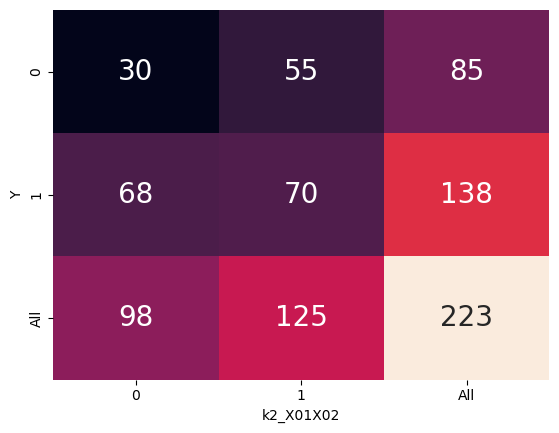

In [25]:
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab( df_clean_copy.Y, df_clean_copy.k2_X01X02, margins=True),
            annot=True, annot_kws={'fontsize': 20}, fmt='g',
            cbar=False,
            ax=ax )

plt.show()

There are clearly mismatch between `Y` and `K_X01X02` but we can see below that the data can be seperated visually using them.

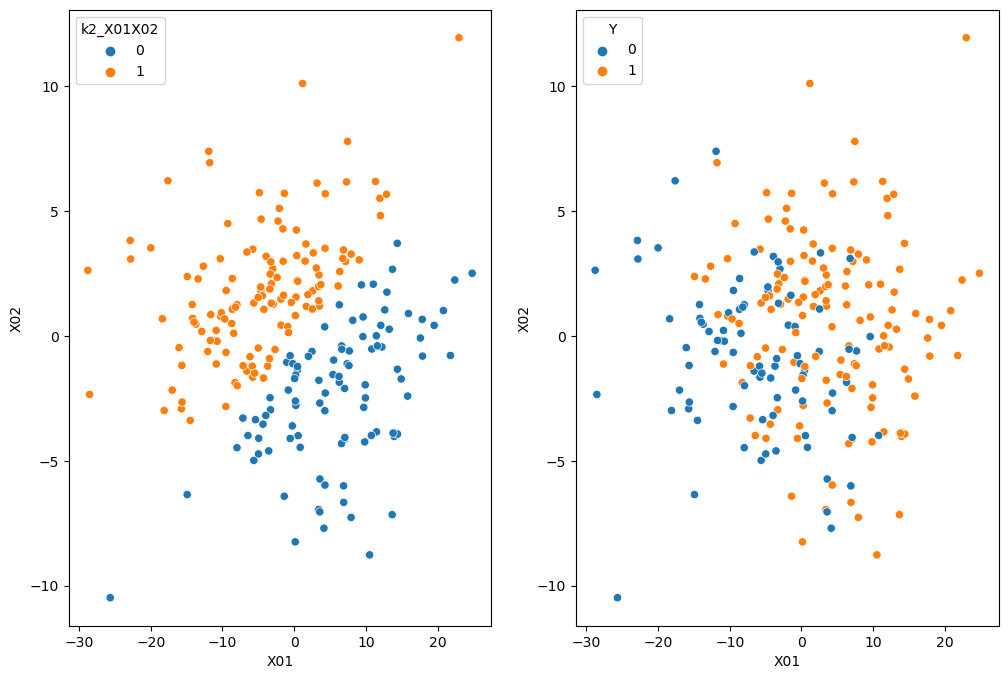

In [26]:
fig, axs =plt.subplots(1,2, figsize=(12,8))
    
    
sns.scatterplot(data=df_clean_copy, x='X01', y='X02', hue='k2_X01X02', ax=axs[0])
sns.scatterplot(data=df_clean_copy, x='X01', y='X02', hue='Y', ax=axs[1])

plt.show()

Similarly we can do it for (V01, X01). Now the problem arises 
* how can we choose 2 features that can replace the 63 columns in the classification problem?
* how can we seperate the data which will match up with Y seperation?( I don't know so far whether it is actually possible or not.)

To answer the first one we will use PCA. Observe that cunningly we mention 2 feature variables but none has taken an oath to replace 63 variables by 2. There are algorithm to select optimal number of replace feature variables but we don't know that yet.

What we can see for the cluster that `k2=0` captures `Y=1` a lot.

In [27]:
from sklearn.decomposition import PCA

pca_poli = PCA(n_components=2).fit_transform( Xpoli )

In [28]:
pca_poli.shape

(223, 2)

In [29]:
type(pca_poli)

numpy.ndarray

In [30]:
pca_poli_df = pd.DataFrame( pca_poli, columns=['pc01', 'pc02'] )


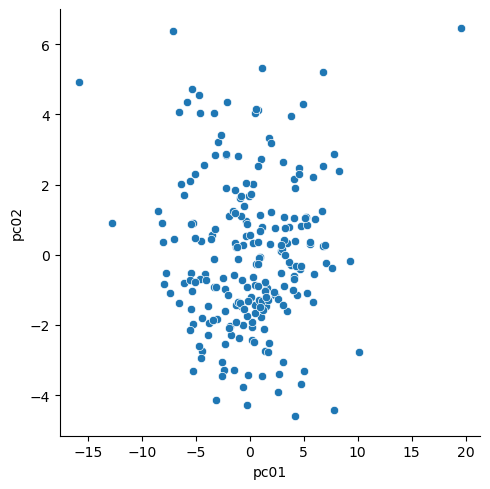

In [31]:
sns.relplot(data = pca_poli_df, x='pc01', y='pc02')

plt.show()

In [32]:
pca_poli_df['Y']=df_clean_copy.Y

In [33]:
pca_poli_df['k2']=df_clean_copy.k2

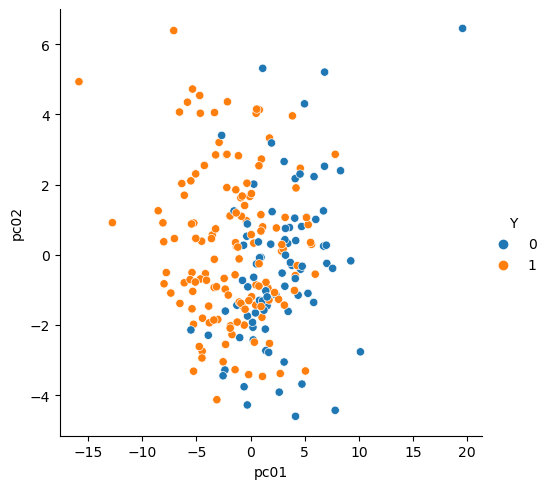

In [34]:
sns.relplot(data = pca_poli_df, x='pc01', y='pc02', hue='Y')

plt.show()

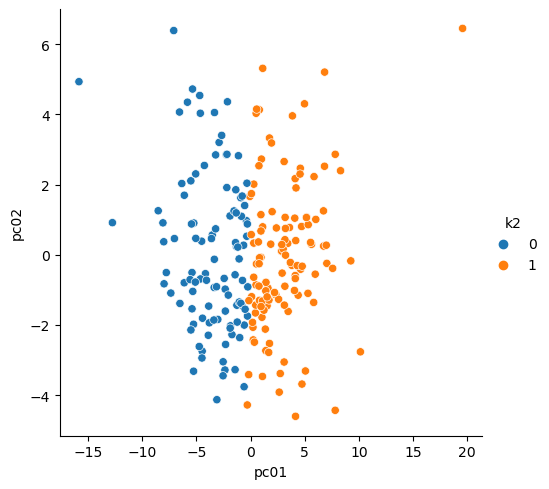

In [35]:
sns.relplot(data = pca_poli_df, x='pc01', y='pc02', hue='k2')

plt.show()

In [36]:
pca_poli_df['k2_X01X02']=df_clean_copy.k2_X01X02

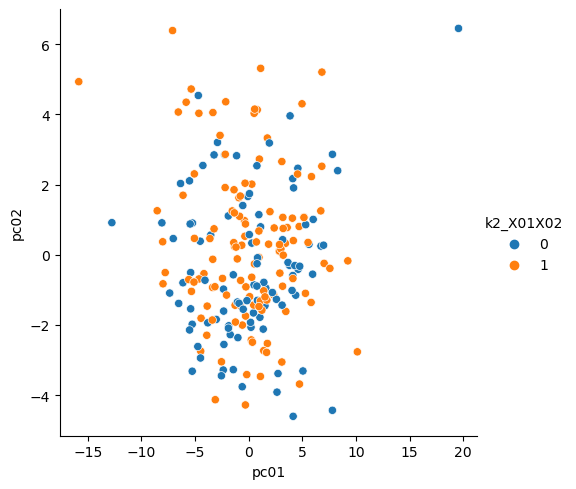

In [37]:
sns.relplot(data = pca_poli_df, x='pc01', y='pc02', hue='k2_X01X02')

plt.show()

So, we can see clearly that the `pc01` and `pc02` seperates the data into two distinct parts of the kmeans clustering `k2`.

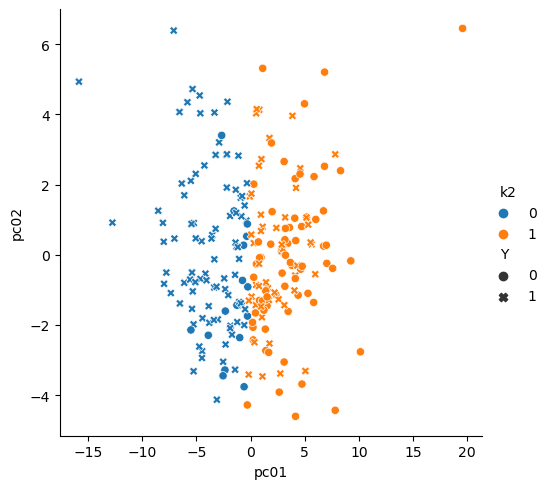

In [38]:
sns.relplot(data = pca_poli_df, x='pc01', y='pc02', hue='k2', style='Y')

plt.show()

Recall the kmeans result:

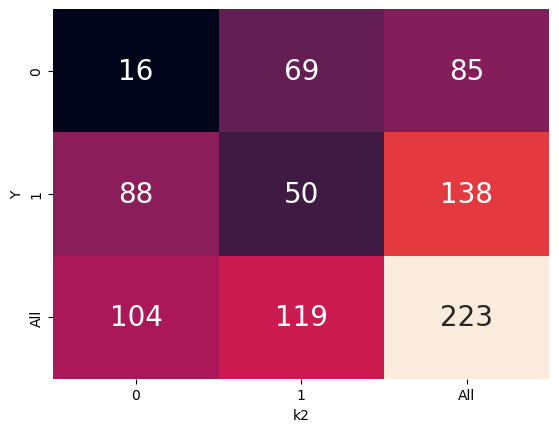

In [39]:
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab( df_clean_copy.Y, df_clean_copy.k2, margins=True),
            annot=True, annot_kws={'fontsize': 20}, fmt='g',
            cbar=False,
            ax=ax )

plt.show()

We can see similar thing in the graph a lot of `k2=0` is `Y=1`. and we can see that just by `pc01` and `pc02` in stead of 63 features.

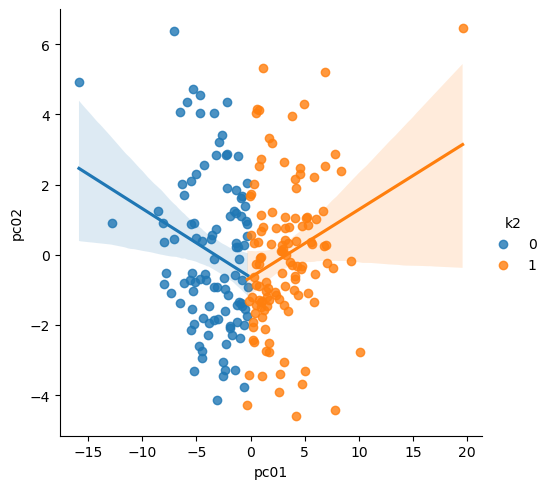

In [40]:
sns.lmplot(data = pca_poli_df, x='pc01', y='pc02', hue='k2')

plt.show()

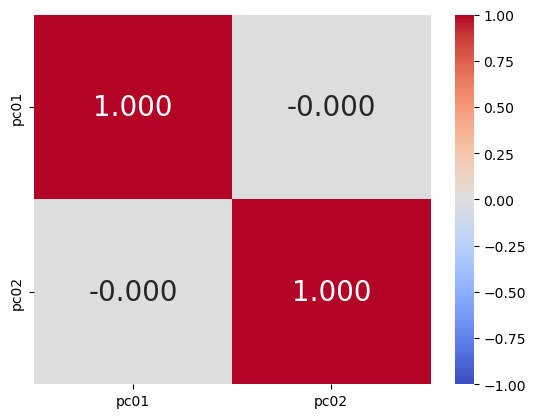

In [41]:
fig, ax=plt.subplots()

sns.heatmap(data=pca_poli_df.loc[:,['pc01','pc02']].corr(),
            vmin=-1, vmax=1, center = 0,
            cmap='coolwarm', annot=True, fmt='.3f',
            annot_kws={'size':20},
            ax=ax)

plt.show()

Hence, two principal components are uncorrelated.

After working on this project. I am getting more interested on this one. I am curious on how to find important optimal features that will give us close approximation of categorical clustering with `Y` and also eager to know about the probability computation in `PCA`.

Pairplot helped me a lot for identify potential input-to- output relationships.

I guess (X01,X02) and (X01,V01) are useful response variable.

Lets focus on Hierarchical clustering

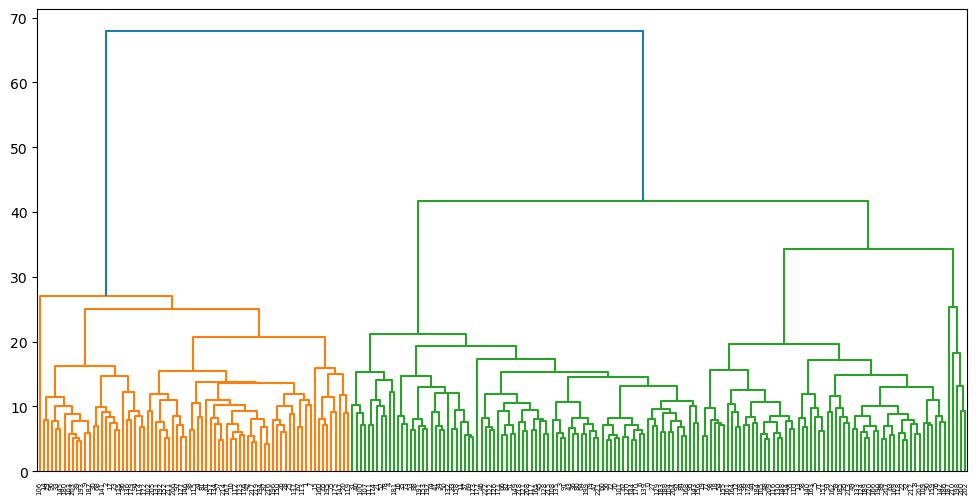

In [42]:
from scipy.cluster import hierarchy

hclust_ward = hierarchy.ward( Xpoli )

fig = plt.figure(figsize=(12, 6))

dn = hierarchy.dendrogram( hclust_ward )

plt.show()

In [43]:
df_clean_copy['hclust_2'] = pd.Series( hierarchy.cut_tree( hclust_ward, n_clusters=2).\
    ravel(),index=df_clean_copy.index ).astype('category')

In [44]:
pca_poli_df['hclust_2'] = pd.Series( hierarchy.cut_tree( hclust_ward, n_clusters=2 ).\
    ravel(),index=df_clean_copy.index ).astype('category')                                    

In [45]:
pca_poli_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pc01       223 non-null    float64 
 1   pc02       223 non-null    float64 
 2   Y          223 non-null    int64   
 3   k2         223 non-null    category
 4   k2_X01X02  223 non-null    int32   
 5   hclust_2   223 non-null    category
dtypes: category(2), float64(2), int32(1), int64(1)
memory usage: 6.9 KB


In [46]:
pca_poli_df.hclust_2.value_counts()

0    148
1     75
Name: hclust_2, dtype: int64

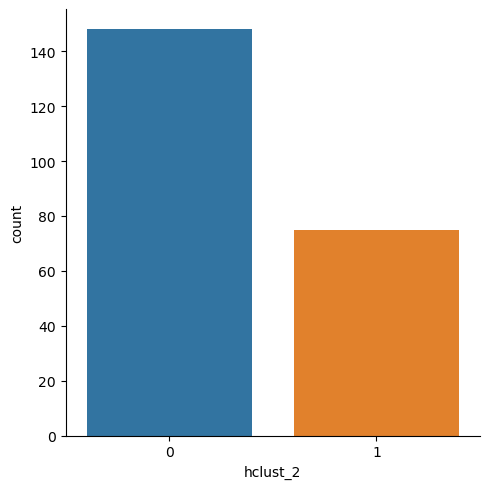

In [47]:
sns.catplot(data= pca_poli_df, x='hclust_2', kind='count')

plt.show()

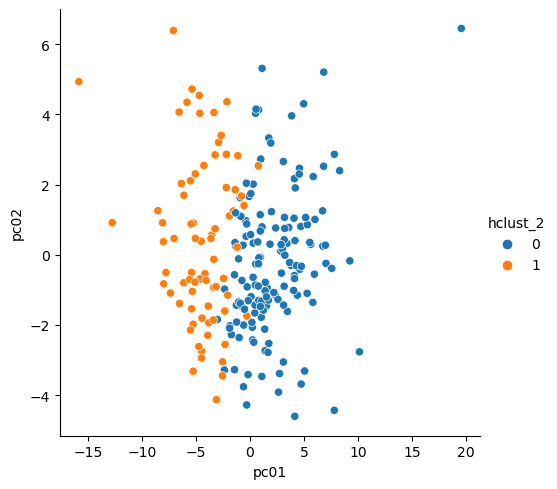

In [48]:
sns.relplot(data = pca_poli_df, x='pc01', y='pc02', hue='hclust_2')

plt.show()

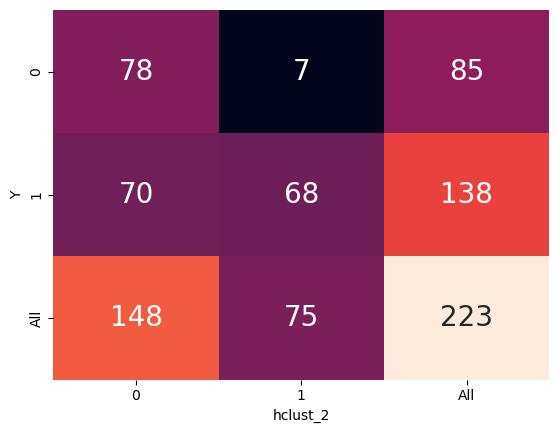

In [50]:
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab( pca_poli_df.Y, pca_poli_df.hclust_2, margins=True ),
            annot=True, annot_kws={'fontsize': 20}, fmt='g', 
            cbar=False,
            ax=ax)

plt.show()

We can see that Hierarchical clustering has done better job than kMeans=2. We can see a good separation in hclust_2=1 where major output falls in Y=1 and in Y=0 where major output falls in hclust_2=0.

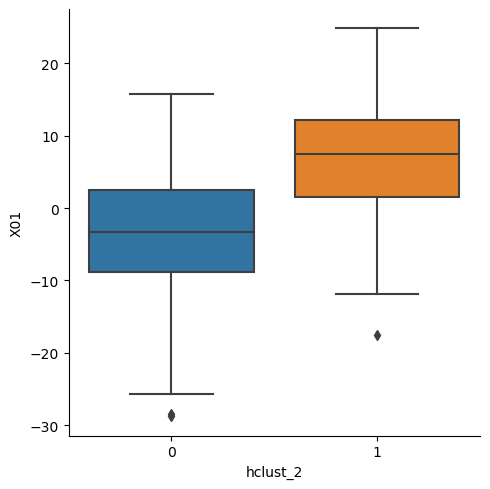

In [51]:
sns.catplot(data = df_clean_copy, x='hclust_2', y='X01', kind='box')

plt.show()

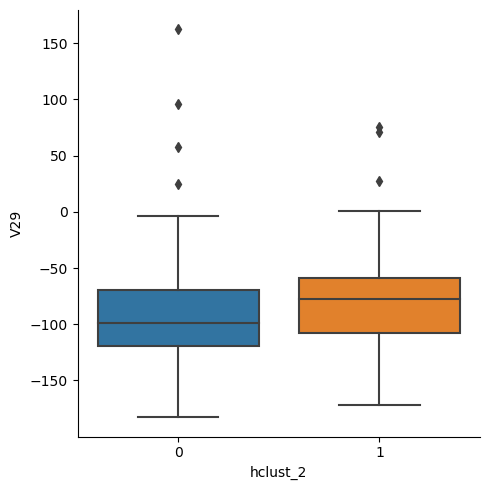

In [52]:
sns.catplot(data = df_clean_copy, x='hclust_2', y='V29', kind='box')

plt.show()

In [54]:
lf_poli = df_clean_copy.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'Y', 'hclust_2'],
     value_vars=df_clean_copy_features.columns)

In [55]:
lf_poli

,rowid,Y,hclust_2,variable,value
0,0,1,0,X01,-2.907070
1,1,1,1,X01,-4.608052
2,2,1,1,X01,4.338816
3,3,0,0,X01,-1.835062
4,4,1,0,X01,13.990969
...,...,...,...,...,...
14044,218,0,0,V29,-100.512718
14045,219,1,1,V29,-118.299085
14046,220,1,0,V29,-102.237684
14047,221,1,0,V29,-119.015441


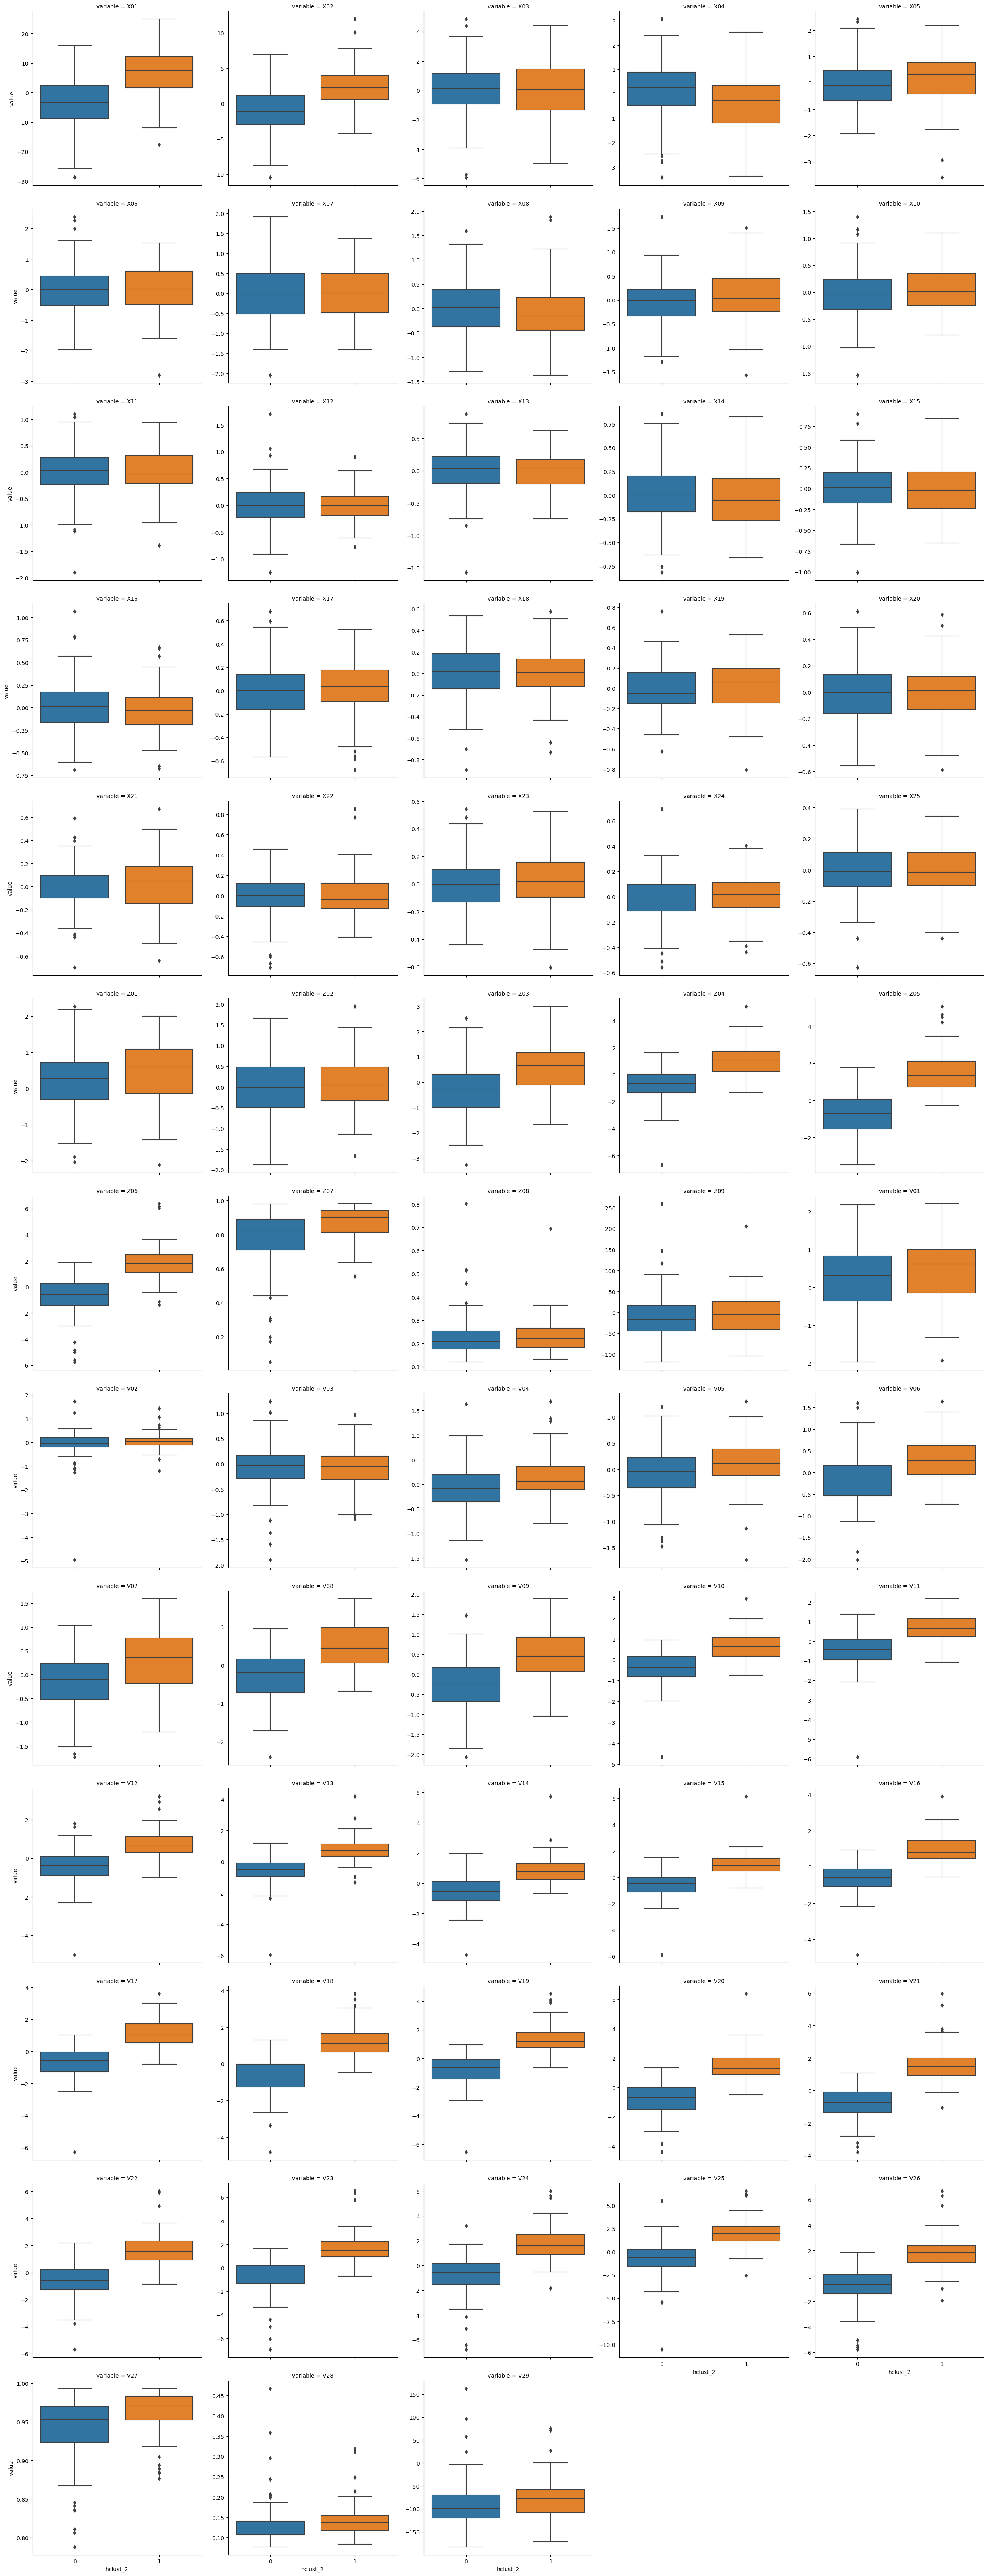

In [56]:
sns.catplot(data = lf_poli, x='hclust_2', y='value', col='variable', col_wrap=5,
            kind='box',
            sharey=False)

plt.show()

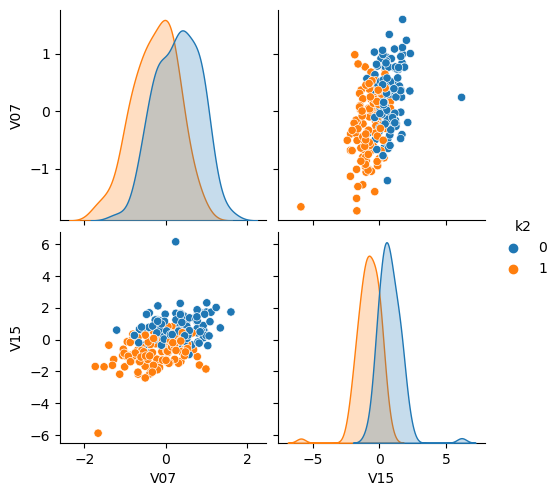

In [59]:
df_clean_copy_part_features = df_clean_copy[['V07', 'V15', 'k2' ]].copy()
sns.pairplot(data=df_clean_copy_part_features, hue='k2',diag_kws={'common_norm': False})

plt.show()